# CISC 351 - Advanced Data Analytics
## Term Project (Winter 2019)
### Home Credit Default Risk
### Mike Cruickshank


Data set is from the Home Credit Default Risk prediction competition on Kaggle
* https://www.kaggle.com/c/home-credit-default-risk

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import matplotlib

### Import Data:

In [291]:
num_rows = 100000
app_test = pd.read_csv("application_test.csv", nrows = num_rows)


In [292]:
app_train = pd.read_csv("application_train.csv", nrows = num_rows)
app_train_copy = app_train.copy()

In [293]:
app_train_0 = app_train[app_train['TARGET'] == 0]
app_train_1 = app_train[app_train['TARGET'] == 1]

f = np.size(app_train_1,0)/np.size(app_train_0,0)
app_train_0 = app_train_0.sample(frac = f)

app_train = pd.concat([app_train_0,app_train_1])

app_train = app_train.sample(frac = 1)
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
31979,137089,0,Cash loans,M,Y,Y,0,292500.0,1080000.0,45886.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
12452,114516,1,Cash loans,M,Y,N,0,238500.0,1080504.0,31095.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
25565,129735,1,Cash loans,M,N,Y,0,112500.0,599778.0,32535.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,1.0
33703,139045,1,Cash loans,F,N,Y,0,112500.0,778968.0,22455.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
75075,187072,0,Cash loans,F,Y,Y,2,180000.0,450000.0,30204.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [288]:
app_train = app_train_copy

In [289]:
bureau = pd.read_csv("bureau.csv", nrows = num_rows)

In [7]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [8]:
bureau_balance = pd.read_csv("bureau_balance.csv", nrows = 100)

In [9]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [10]:
credit_card_balance = pd.read_csv("credit_card_balance.csv", nrows = 100)
installments = pd.read_csv("installments_payments.csv", nrows = 100)
pos_cash_balance = pd.read_csv("POS_CASH_balance.csv", nrows = 100)
previous_app = pd.read_csv("previous_application.csv", nrows = 100)
sample_submission = pd.read_csv("sample_submission.csv", nrows = 100)

In [11]:
#columns_description = pd.read_csv("HomeCredit_columns_description.csv")


### EDA:

In [175]:
print("Size of Data Sources:\n")
print("app_train: %d x %d" % (np.shape(app_train)))
print("app_test: %d x %d" % (np.shape(app_test)))
print("bureau: %d x %d" % (np.shape(bureau)))
print("bureau_balance: %d x %d" % (np.shape(bureau_balance)))
print("credit_card_balance: %d x %d" % (np.shape(credit_card_balance)))
print("installments: %d x %d" % (np.shape(installments)))
print("previous_app: %d x %d" % (np.shape(previous_app)))
print("sample_submission: %d x %d" % (np.shape(sample_submission)))




Size of Data Sources:

app_train: 50000 x 122
app_test: 48744 x 121
bureau: 100 x 17
bureau_balance: 100 x 3
credit_card_balance: 100 x 23
installments: 100 x 8
previous_app: 100 x 37
sample_submission: 100 x 2


In [31]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Check for missing values in each data set:

In [32]:
def CheckMissingValues(df, display_num = 10):
    percent_missing = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    percent_missing = pd.concat([percent_missing],axis=1,keys=['Percent Missing'])
    print("\n")
    print(percent_missing.head(display_num))
    return


In [15]:
CheckMissingValues(app_train)
CheckMissingValues(app_test)
CheckMissingValues(bureau)
CheckMissingValues(bureau_balance)



                          Percent Missing
COMMONAREA_AVG                       73.0
COMMONAREA_MODE                      73.0
COMMONAREA_MEDI                      73.0
NONLIVINGAPARTMENTS_MODE             70.0
NONLIVINGAPARTMENTS_MEDI             70.0
LIVINGAPARTMENTS_MODE                70.0
NONLIVINGAPARTMENTS_AVG              70.0
LIVINGAPARTMENTS_AVG                 70.0
LIVINGAPARTMENTS_MEDI                70.0
OWN_CAR_AGE                          70.0


                          Percent Missing
COMMONAREA_MEDI                      74.0
COMMONAREA_AVG                       74.0
COMMONAREA_MODE                      74.0
NONLIVINGAPARTMENTS_MODE             73.0
NONLIVINGAPARTMENTS_MEDI             73.0
NONLIVINGAPARTMENTS_AVG              73.0
FLOORSMIN_AVG                        72.0
FLOORSMIN_MEDI                       72.0
LIVINGAPARTMENTS_MEDI                72.0
LIVINGAPARTMENTS_MODE                72.0


                        Percent Missing
AMT_ANNUITY                   

In [16]:
CheckMissingValues(credit_card_balance)
CheckMissingValues(installments)
CheckMissingValues(pos_cash_balance)
CheckMissingValues(previous_app)



                            Percent Missing
AMT_DRAWINGS_POS_CURRENT               12.0
CNT_DRAWINGS_POS_CURRENT               12.0
CNT_DRAWINGS_OTHER_CURRENT             12.0
CNT_DRAWINGS_ATM_CURRENT               12.0
AMT_DRAWINGS_ATM_CURRENT               12.0
AMT_DRAWINGS_OTHER_CURRENT             12.0
AMT_PAYMENT_CURRENT                    12.0
SK_DPD_DEF                              0.0
SK_ID_CURR                              0.0
MONTHS_BALANCE                          0.0


                        Percent Missing
AMT_PAYMENT                         0.0
AMT_INSTALMENT                      0.0
DAYS_ENTRY_PAYMENT                  0.0
DAYS_INSTALMENT                     0.0
NUM_INSTALMENT_NUMBER               0.0
NUM_INSTALMENT_VERSION              0.0
SK_ID_CURR                          0.0
SK_ID_PREV                          0.0


                       Percent Missing
SK_DPD_DEF                         0.0
SK_DPD                             0.0
NAME_CONTRACT_STATUS             

Distribution of target variable:

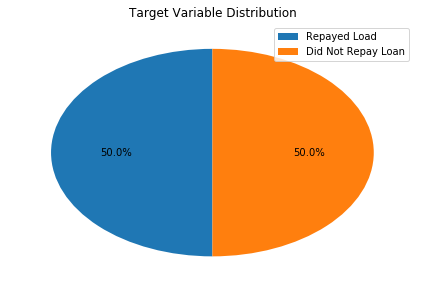

In [294]:
temp = app_train['TARGET'].value_counts()
labels = ['Repayed Load','Did Not Repay Loan']
plt.pie(temp.values,
       autopct='%1.1f%%', startangle = 90)
plt.tight_layout()
plt.title('Target Variable Distribution')
plt.legend(labels, loc="upper right")
plt.show()


### Data Pre-Processing

In [295]:
app_train_target = app_train['TARGET']
app_train = app_train.drop(columns = ['TARGET'])



In [296]:
app_train.sort_values(by=['SK_ID_CURR']).head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
11,100015,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
14,100018,Cash loans,F,N,Y,0,189000.000,773680.5,32778.0,679500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
26,100031,Cash loans,F,N,Y,0,112500.000,979992.0,27076.5,702000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
39,100046,Revolving loans,M,Y,Y,0,180000.000,540000.0,27000.0,540000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0


In [297]:
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    cat_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns = cat_columns, dummy_na = nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns


In [298]:
app_train, cat_cols = one_hot_encoder(app_train)

Split into Train and Test Set:

In [304]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(app_train, app_train_target, test_size = 0.3)

Scale and Imput Data:

In [305]:
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.impute import SimpleImputer

imputer = Imputer(strategy = 'median')
scaler = StandardScaler()

imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)
#app_train = imputer.transform(app_train)

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\Mike\Anaconda3\envs\CISC351_Project\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Function to analyze model performance:

In [306]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def model_performance(model, X_train, X_test, y_train, y_test):
    
    print('\nTrain Set:')
    print('Accuracy: %.3f' % model.score(X_train, y_train))
    y_pred = model.predict(X_train)
    class_report = classification_report(y_train, y_pred)
    print(class_report)
          
    con_mat = confusion_matrix(y_train, y_pred)
    print(con_mat)
    tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
    print("TP: %d" % tp)
    print("TN: %d" % tn)
    print("FP: %d" % fp)
    print("FN: %d" % fn)

    print('\nTest Set:')
    y_pred = model.predict(X_test)
    print('Accuracy: %.3f' % model.score(X_test, y_test))
    class_report = classification_report(y_test, y_pred)
    print(class_report)

    con_mat = confusion_matrix(y_test, y_pred)
    print(con_mat)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print("TP: %d" % tp)
    print("TN: %d" % tn)
    print("FP: %d" % fp)
    print("FN: %d" % fn)


## Baseline Models( application_train table only)

#### Logistic Regression

In [307]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(solver = 'lbfgs')
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

C:\Users\Mike\Anaconda3\envs\CISC351_Project\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [308]:
model_performance(LR, X_train, X_test, y_train, y_test)


Train Set:
Accuracy: 0.689
              precision    recall  f1-score   support

           0       0.69      0.70      0.69      5678
           1       0.69      0.68      0.69      5652

   micro avg       0.69      0.69      0.69     11330
   macro avg       0.69      0.69      0.69     11330
weighted avg       0.69      0.69      0.69     11330

[[3952 1726]
 [1792 3860]]
TP: 3860
TN: 3952
FP: 1726
FN: 1792

Test Set:
Accuracy: 0.674
              precision    recall  f1-score   support

           0       0.67      0.68      0.67      2415
           1       0.68      0.67      0.67      2441

   micro avg       0.67      0.67      0.67      4856
   macro avg       0.67      0.67      0.67      4856
weighted avg       0.67      0.67      0.67      4856

[[1640  775]
 [ 806 1635]]
TP: 1635
TN: 1640
FP: 775
FN: 806


#### Gradient Boosting

In [309]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators = 100, subsample = 0.80,
                                learning_rate = 0.1, min_samples_split = 20,
                                max_depth = 4)
gbm.fit(X_train, y_train)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=20,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [310]:
model_performance(gbm, X_train, X_test, y_train, y_test)


Train Set:
Accuracy: 0.746
              precision    recall  f1-score   support

           0       0.74      0.75      0.75      5678
           1       0.75      0.74      0.74      5652

   micro avg       0.75      0.75      0.75     11330
   macro avg       0.75      0.75      0.75     11330
weighted avg       0.75      0.75      0.75     11330

[[4282 1396]
 [1482 4170]]
TP: 4170
TN: 4282
FP: 1396
FN: 1482

Test Set:
Accuracy: 0.674
              precision    recall  f1-score   support

           0       0.67      0.68      0.67      2415
           1       0.68      0.67      0.67      2441

   micro avg       0.67      0.67      0.67      4856
   macro avg       0.67      0.67      0.67      4856
weighted avg       0.67      0.67      0.67      4856

[[1633  782]
 [ 801 1640]]
TP: 1640
TN: 1633
FP: 782
FN: 801


In [311]:
print(np.shape(gbm.feature_importances_))
print(np.shape(X_train))

(257,)
(11330, 257)


#### Neural Network:

In [312]:
from sklearn.neural_network import MLPClassifier

In [343]:
mlp = MLPClassifier(hidden_layer_sizes = (100,20), learning_rate_init = 0.0001, 
                             max_iter = 100, early_stopping = True, verbose = True, tol = 1e-3)
mlp.fit(X_train,y_train)


Iteration 1, loss = 0.74646825
Validation score: 0.528685
Iteration 2, loss = 0.70809043
Validation score: 0.557811
Iteration 3, loss = 0.68630089
Validation score: 0.581642
Iteration 4, loss = 0.67040438
Validation score: 0.592233
Iteration 5, loss = 0.65783014
Validation score: 0.605472
Iteration 6, loss = 0.64695808
Validation score: 0.612533
Iteration 7, loss = 0.63740880
Validation score: 0.626655
Iteration 8, loss = 0.62869122
Validation score: 0.629303
Iteration 9, loss = 0.62091325
Validation score: 0.640777
Iteration 10, loss = 0.61377459
Validation score: 0.641659
Iteration 11, loss = 0.60736817
Validation score: 0.651368
Iteration 12, loss = 0.60133761
Validation score: 0.653133
Iteration 13, loss = 0.59582445
Validation score: 0.654016
Iteration 14, loss = 0.59078873
Validation score: 0.653133
Iteration 15, loss = 0.58600086
Validation score: 0.654016
Iteration 16, loss = 0.58159834
Validation score: 0.650485
Iteration 17, loss = 0.57755242
Validation score: 0.653133
Iterat

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100, 20), learning_rate='constant',
       learning_rate_init=0.0001, max_iter=100, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [344]:
model_performance(mlp, X_train, X_test, y_train, y_test)


Train Set:
Accuracy: 0.729
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      5678
           1       0.73      0.73      0.73      5652

   micro avg       0.73      0.73      0.73     11330
   macro avg       0.73      0.73      0.73     11330
weighted avg       0.73      0.73      0.73     11330

[[4127 1551]
 [1514 4138]]
TP: 4138
TN: 4127
FP: 1551
FN: 1514

Test Set:
Accuracy: 0.658
              precision    recall  f1-score   support

           0       0.66      0.65      0.66      2415
           1       0.66      0.66      0.66      2441

   micro avg       0.66      0.66      0.66      4856
   macro avg       0.66      0.66      0.66      4856
weighted avg       0.66      0.66      0.66      4856

[[1580  835]
 [ 828 1613]]
TP: 1613
TN: 1580
FP: 835
FN: 828


## Add Engineered Features

Import a dataset of engineered features that was created using featuretools

In [264]:
engineered_feat = pd.read_csv("feature_matrix.csv")


In [345]:
print(np.shape(engineered_feat))
engineered_feat.head()

(356255, 1321)


,SK_ID_CURR,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,...,MIN(bureau.SUM(bureau_balance.MONTHS_BALANCE)),MIN(bureau.MAX(bureau_balance.MONTHS_BALANCE)),MIN(bureau.MEAN(bureau_balance.MONTHS_BALANCE)),MIN(bureau.COUNT(bureau_balance)),MEAN(bureau.SUM(bureau_balance.MONTHS_BALANCE)),MEAN(bureau.MAX(bureau_balance.MONTHS_BALANCE)),MEAN(bureau.MIN(bureau_balance.MONTHS_BALANCE)),MEAN(bureau.MEAN(bureau_balance.MONTHS_BALANCE)),MEAN(bureau.COUNT(bureau_balance)),MODE(bureau.MODE(bureau_balance.STATUS))
0,0,53595.0,715095.0,675000.0,90000.0,0.0,0.0,1.0,0.0,0.0,...,-4560.0,-91.0,-93.0,5.0,-1122.750,-21.625,-46.625000,-34.125000,26.000000,0
1,100001,20560.5,568800.0,450000.0,135000.0,0.0,0.0,0.0,0.0,0.0,...,-1326.0,0.0,-25.5,2.0,-400.000,0.000,-23.571429,-11.785714,24.571429,C
2,100002,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,...,-632.0,-32.0,-39.5,4.0,-337.625,-15.500,-28.250000,-21.875000,13.750000,1
3,100003,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.000,NaN,NaN,NaN,0.000000,NaN
4,100004,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.000,NaN,NaN,NaN,0.000000,NaN


In [346]:
print(np.shape(app_train))
print(np.shape(app_test))
print(np.size(app_train,0) + np.size(app_test,0))


(16186, 257)
(48744, 121)
64930


In [347]:
app_with_eng_feat = app_train.merge(engineered_feat, how='left', on='SK_ID_CURR')
print(app_with_eng_feat.shape)
app_with_eng_feat.head()

(16186, 1577)


,SK_ID_CURR,CNT_CHILDREN_x,AMT_INCOME_TOTAL_x,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE_x,DAYS_BIRTH_x,DAYS_EMPLOYED_x,DAYS_REGISTRATION_x,...,MIN(bureau.SUM(bureau_balance.MONTHS_BALANCE)),MIN(bureau.MAX(bureau_balance.MONTHS_BALANCE)),MIN(bureau.MEAN(bureau_balance.MONTHS_BALANCE)),MIN(bureau.COUNT(bureau_balance)),MEAN(bureau.SUM(bureau_balance.MONTHS_BALANCE)),MEAN(bureau.MAX(bureau_balance.MONTHS_BALANCE)),MEAN(bureau.MIN(bureau_balance.MONTHS_BALANCE)),MEAN(bureau.MEAN(bureau_balance.MONTHS_BALANCE)),MEAN(bureau.COUNT(bureau_balance)),MODE(bureau.MODE(bureau_balance.STATUS))
0,137089,0,292500.0,1080000.0,45886.5,1080000.0,0.018850,-11503,-4654,-5274.0,...,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN
1,114516,0,238500.0,1080504.0,31095.0,774000.0,0.022625,-15914,-356,-7231.0,...,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN
2,129735,0,112500.0,599778.0,32535.0,477000.0,0.018634,-10088,-393,-4871.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0
3,139045,0,112500.0,778968.0,22455.0,558000.0,0.018801,-22807,365243,-6442.0,...,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN
4,187072,2,180000.0,450000.0,30204.0,450000.0,0.028663,-12149,-3059,-2697.0,...,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN


In [348]:
app_with_eng_feat, cat_cols = one_hot_encoder(app_with_eng_feat)

Split into Train and Test Set:

In [349]:
app_with_eng_feat_target = app_with_eng_feat['TARGET']
app_with_eng_feat = app_with_eng_feat.drop(columns = ['TARGET'])

X_train, X_test, y_train, y_test = train_test_split(app_with_eng_feat, app_with_eng_feat_target, test_size = 0.3)

Scale and Imput Data:

In [350]:

imputer = Imputer(strategy = 'median')
scaler = StandardScaler()

imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)
#app_train = imputer.transform(app_train)

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\Mike\Anaconda3\envs\CISC351_Project\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


#### Logistic Regression

In [351]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(solver = 'lbfgs')
LR.fit(X_train, y_train)


C:\Users\Mike\Anaconda3\envs\CISC351_Project\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [352]:
model_performance(LR, X_train, X_test, y_train, y_test)


Train Set:
Accuracy: 0.735
              precision    recall  f1-score   support

         0.0       0.74      0.73      0.73      5651
         1.0       0.73      0.74      0.74      5679

   micro avg       0.74      0.74      0.74     11330
   macro avg       0.74      0.74      0.74     11330
weighted avg       0.74      0.74      0.74     11330

[[4132 1519]
 [1483 4196]]
TP: 4196
TN: 4132
FP: 1519
FN: 1483

Test Set:
Accuracy: 0.679
              precision    recall  f1-score   support

         0.0       0.68      0.68      0.68      2442
         1.0       0.68      0.68      0.68      2414

   micro avg       0.68      0.68      0.68      4856
   macro avg       0.68      0.68      0.68      4856
weighted avg       0.68      0.68      0.68      4856

[[1659  783]
 [ 777 1637]]
TP: 1637
TN: 1659
FP: 783
FN: 777


#### Gradient Boosting

In [353]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators = 100, subsample = 0.90,
                                learning_rate = 0.1, min_samples_split = 100,
                                max_depth = 5)
gbm.fit(X_train, y_train)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=100,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=0.9, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [354]:
model_performance(gbm, X_train, X_test, y_train, y_test)


Train Set:
Accuracy: 0.823
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82      5651
         1.0       0.82      0.83      0.82      5679

   micro avg       0.82      0.82      0.82     11330
   macro avg       0.82      0.82      0.82     11330
weighted avg       0.82      0.82      0.82     11330

[[4636 1015]
 [ 985 4694]]
TP: 4694
TN: 4636
FP: 1015
FN: 985

Test Set:
Accuracy: 0.698
              precision    recall  f1-score   support

         0.0       0.70      0.69      0.70      2442
         1.0       0.69      0.70      0.70      2414

   micro avg       0.70      0.70      0.70      4856
   macro avg       0.70      0.70      0.70      4856
weighted avg       0.70      0.70      0.70      4856

[[1693  749]
 [ 718 1696]]
TP: 1696
TN: 1693
FP: 749
FN: 718


#### Neural Network:

In [355]:
from sklearn.neural_network import MLPClassifier

In [356]:
mlp = MLPClassifier(hidden_layer_sizes = (100,20), learning_rate_init = 0.0001, 
                             max_iter = 100, early_stopping = True, 
                             verbose = False, tol = 1e-4)
mlp.fit(X_train,y_train)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100, 20), learning_rate='constant',
       learning_rate_init=0.0001, max_iter=100, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [357]:
model_performance(mlp, X_train, X_test, y_train, y_test)


Train Set:
Accuracy: 0.788
              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79      5651
         1.0       0.79      0.79      0.79      5679

   micro avg       0.79      0.79      0.79     11330
   macro avg       0.79      0.79      0.79     11330
weighted avg       0.79      0.79      0.79     11330

[[4458 1193]
 [1208 4471]]
TP: 4471
TN: 4458
FP: 1193
FN: 1208

Test Set:
Accuracy: 0.672
              precision    recall  f1-score   support

         0.0       0.67      0.68      0.67      2442
         1.0       0.67      0.67      0.67      2414

   micro avg       0.67      0.67      0.67      4856
   macro avg       0.67      0.67      0.67      4856
weighted avg       0.67      0.67      0.67      4856

[[1652  790]
 [ 801 1613]]
TP: 1613
TN: 1652
FP: 790
FN: 801


# Join Data Frames

In [289]:
df = app_train
print("df shape:", df.shape)
print("Bureau df shape:", bureau.shape)
bureau, bureau_cat = one_hot_encoder(bureau)
print("Bureau df shape:", bureau.shape)
df = df.merge(bureau, how='left', on='SK_ID_CURR')
print("df shape:", df.shape)


df shape: (307511, 261)
Bureau df shape: (1716428, 40)
Bureau df shape: (1716428, 40)
df shape: (1509345, 300)


In [296]:
df.sort_values(by=['SK_ID_CURR']).head(20)


,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan,CREDIT_TYPE_nan
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Automated Feature Engineering

In [4]:
import featuretools as ft